# 参数学习曲线

单一参数的学习,高偏差还是高误差。将单一参数的不同的值,设置成x轴,而训练集和验证集的分数为y轴,可以通过这种方式来进行绘制曲线。

这里有一点需要特别的注意:在之前的所有训练集的拆分中,Grid Search中进行拆分的方法是将训练集才分成,训练集和交叉验证集。而现在是拆分成了3部分,训练集,交叉验证集,测试集。因为训练集+交叉验证集是为了训练参数,而训练出来的参数可能过拟合也可能欠拟合,那么需要对测试集进行学习曲线绘制来得到更好的解释

In [5]:
import numpy as np
from sklearn.learning_curve import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
import matplotlib
import pandas
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
np.random.seed(0)
iris = load_iris()
X, y = iris.data, iris.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_range = np.logspace(-7, 3, 10)

train_scores, valid_scores = validation_curve(Ridge(),
                                              X,
                                              y,
                                              'alpha',
                                              param_range,
                                              cv=3)
print param_range

[  1.00000000e-07   1.29154967e-06   1.66810054e-05   2.15443469e-04
   2.78255940e-03   3.59381366e-02   4.64158883e-01   5.99484250e+00
   7.74263683e+01   1.00000000e+03]


In [7]:
print train_scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
print '-' * 40
print train_scores_mean

[[ 0.94141575  0.92944161  0.92267644]
 [ 0.94141575  0.92944161  0.92267644]
 [ 0.94141575  0.92944161  0.92267644]
 [ 0.94141575  0.92944161  0.92267644]
 [ 0.94141574  0.92944161  0.92267643]
 [ 0.94141426  0.92944053  0.92267515]
 [ 0.94122796  0.92929956  0.92250918]
 [ 0.93480506  0.92406493  0.91682626]
 [ 0.89180363  0.88543648  0.87422985]
 [ 0.47253778  0.45601093  0.42887489]]
----------------------------------------
[ 0.93117793  0.93117793  0.93117793  0.93117793  0.93117792  0.93117665
  0.93101223  0.92523208  0.88382332  0.45247453]


In [8]:
print valid_scores
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
print '-' * 40
print valid_scores_mean

[[ 0.90335825  0.92525985  0.94159336]
 [ 0.90335825  0.92525985  0.94159336]
 [ 0.90335829  0.92525981  0.94159335]
 [ 0.90335884  0.92525929  0.9415933 ]
 [ 0.90336582  0.92525265  0.94159266]
 [ 0.90345335  0.92516663  0.94158318]
 [ 0.90425122  0.92403578  0.94131162]
 [ 0.90363932  0.91205438  0.93500627]
 [ 0.8636381   0.84995236  0.91022999]
 [ 0.44639995  0.39639757  0.4567671 ]]
----------------------------------------
[ 0.92340382  0.92340382  0.92340382  0.92340381  0.92340371  0.92340105
  0.92319954  0.91689999  0.87460681  0.43318821]


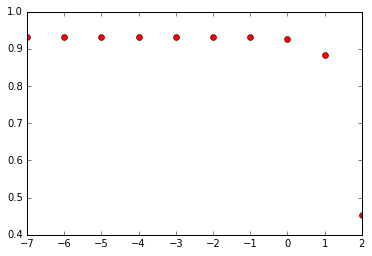

In [9]:
#plt.plot(x=param_range, y=train_scores_mean)
plt.plot(range(-7, 3, 1), train_scores_mean, 'ro')

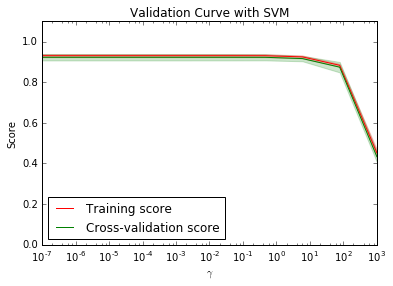

In [10]:
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

小技巧,当使用较小的数值的时候,例如这个例子中使用的是 np.logspace(-7, 3, 10), 这里的最小值是1.0e-7, 最大值是1.0e+03,10表示的是从最小值到最大值分成了10份，那么每一份就是 (1.0e+03 - 1.0e-7)/9=111。那么在plot的时候，如果使用真实的数值那么横坐标的跨度太大，这时候我们希望使用对数坐标，那么最小值 lg(1.0e-7)=-7 最大值 log(1.0e+03)=3，这样的横坐标绘制起来就很紧凑。使用 plt.semilogx 来变换成对数坐标系绘制。

In [11]:
log_data = np.logspace(-7,3, 10)
print log_data

[  1.00000000e-07   1.29154967e-06   1.66810054e-05   2.15443469e-04
   2.78255940e-03   3.59381366e-02   4.64158883e-01   5.99484250e+00
   7.74263683e+01   1.00000000e+03]
